In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [3]:
data = pd.read_csv("Dados/breast-cancer-wisconsin.data", sep = ',', names=['Sample_id', 'Clump_Thickness', 'Cell_Size', 'Cell_Shape',
                                                                    'Marginal_Adhesion', 'Epithelial_Cell_Size', 'Bare_Nuclei',
                                                                    'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'])

In [4]:
data

,Sample_id,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Sample_id             699 non-null    int64 
 1   Clump_Thickness       699 non-null    int64 
 2   Cell_Size             699 non-null    int64 
 3   Cell_Shape            699 non-null    int64 
 4   Marginal_Adhesion     699 non-null    int64 
 5   Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei           699 non-null    object
 7   Bland_Chromatin       699 non-null    int64 
 8   Normal_Nucleoli       699 non-null    int64 
 9   Mitoses               699 non-null    int64 
 10  Class                 699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
# Converter object para float
data["Bare_Nuclei"] = pd.to_numeric(data["Bare_Nuclei"], errors='coerce')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sample_id             699 non-null    int64  
 1   Clump_Thickness       699 non-null    int64  
 2   Cell_Size             699 non-null    int64  
 3   Cell_Shape            699 non-null    int64  
 4   Marginal_Adhesion     699 non-null    int64  
 5   Epithelial_Cell_Size  699 non-null    int64  
 6   Bare_Nuclei           683 non-null    float64
 7   Bland_Chromatin       699 non-null    int64  
 8   Normal_Nucleoli       699 non-null    int64  
 9   Mitoses               699 non-null    int64  
 10  Class                 699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [8]:
# Checar se as classes estão balanceadas
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [9]:
# Checar se existem dados duplicados
print("Duplicated values: ", data.duplicated().sum())
duplicate = data[data.duplicated()]
duplicate

Duplicated values:  8


,Sample_id,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
208,1218860,1,1,1,1,1,1.0,3,1,1,2
253,1100524,6,10,10,2,8,10.0,7,3,3,4
254,1116116,9,10,10,1,10,8.0,3,3,1,4
258,1198641,3,1,1,1,2,1.0,3,1,1,2
272,320675,3,3,5,2,3,10.0,7,1,1,4
338,704097,1,1,1,1,1,1.0,2,1,1,2
561,1321942,5,1,1,1,2,1.0,3,1,1,2
684,466906,1,1,1,1,2,1.0,1,1,1,2


In [10]:
# Remover dados duplicados, deixando apenas a primeira ocorrência
data.drop_duplicates(keep='first',inplace=True) 
data

,Sample_id,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [11]:
# Checar se as classes estão balanceadas
data['Class'].value_counts()

2    453
4    238
Name: Class, dtype: int64

In [12]:
# Checar se existem dados faltantes
print("Missing values: ", data.isnull().sum().sum())

Missing values:  16


In [13]:
print("Missing values: ", data.isnull().sum())

Missing values:  Sample_id                0
Clump_Thickness          0
Cell_Size                0
Cell_Shape               0
Marginal_Adhesion        0
Epithelial_Cell_Size     0
Bare_Nuclei             16
Bland_Chromatin          0
Normal_Nucleoli          0
Mitoses                  0
Class                    0
dtype: int64


In [14]:
# Substituindo todos os elementos NaN pela mediana da coluna
new_data = data.fillna(data.median())

In [15]:
new_data = new_data.drop('Sample_id', axis=1)
new_data

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [16]:
corr = new_data.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_Thickness,1.000000,0.643340,0.653752,0.487949,0.517448,0.590841,0.561076,0.535712,0.350354,0.716938
Cell_Size,0.643340,1.000000,0.905420,0.713117,0.747111,0.684791,0.759525,0.727239,0.460064,0.817720
Cell_Shape,0.653752,0.905420,1.000000,0.690989,0.714393,0.704382,0.738455,0.724693,0.440592,0.817693
Marginal_Adhesion,0.487949,0.713117,0.690989,1.000000,0.608477,0.672719,0.669813,0.602453,0.417167,0.701371
Epithelial_Cell_Size,0.517448,0.747111,0.714393,0.608477,1.000000,0.580709,0.620518,0.634058,0.482644,0.681233
Bare_Nuclei,0.590841,0.684791,0.704382,0.672719,0.580709,1.000000,0.672687,0.578417,0.343020,0.816787
Bland_Chromatin,0.561076,0.759525,0.738455,0.669813,0.620518,0.672687,1.000000,0.669059,0.343821,0.756618
Normal_Nucleoli,0.535712,0.727239,0.724693,0.602453,0.634058,0.578417,0.669059,1.000000,0.427644,0.715540
Mitoses,0.350354,0.460064,0.440592,0.417167,0.482644,0.343020,0.343821,0.427644,1.000000,0.424111
Class,0.716938,0.817720,0.817693,0.701371,0.681233,0.816787,0.756618,0.715540,0.424111,1.000000


# Rede neural

In [17]:
from sklearn.neural_network import MLPClassifier

In [18]:
X=new_data[new_data.columns[new_data.columns!='Class']]
X.head()

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [19]:
Y=new_data['Class']
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [20]:
train_x, test_x, train_y,test_y=train_test_split(X,Y,random_state=0,test_size=0.2)
print(train_y.shape, test_y.shape)

(552,) (139,)


In [21]:
def MLP(train_x, train_y, test_x, test_y):
    reg = MLPClassifier(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=200).fit(train_x, train_y)
    y_pred=reg.predict(test_x)

    model_accuracy = round(accuracy_score(test_y, y_pred),2)
    #confusion matrix
    cm = confusion_matrix(test_y, y_pred)
    return model_accuracy,cm

In [22]:
accuracy,conf_marix = MLP(train_x, train_y, test_x ,test_y)
print("Model Accuracy:" + str(accuracy) + "\n" + "Confusion Matrix:\n" + str(conf_marix))

Model Accuracy:0.91
Confusion Matrix:
[[85  7]
 [ 5 42]]


/home/thais/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Normalizar os dados

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.fit_transform(test_x)

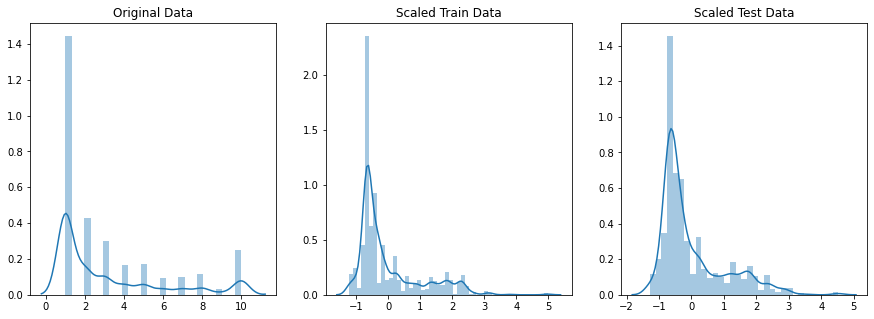

In [26]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
sns.distplot(np.concatenate(X.values), ax=ax[0]).set_title('Original Data')
sns.distplot(np.concatenate(X_train_scaled), ax=ax[1]).set_title('Scaled Train Data')
sns.distplot(np.concatenate(X_test_scaled), ax=ax[2]).set_title('Scaled Test Data')
plt.tight_layout
plt.show()

In [27]:
accuracy,conf_marix = MLP(X_train_scaled, train_y, X_test_scaled ,test_y)
print("Model Accuracy:" + str(accuracy) + "\n" + "Confusion Matrix:\n" + str(conf_marix))

Model Accuracy:0.94
Confusion Matrix:
[[85  7]
 [ 1 46]]
